<a href="https://colab.research.google.com/github/TutuBraz/metodos_num/blob/main/T3_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho T3 - Aproximação de Funções: 
## Interpolação e ajuste por mínimos quadrados 

### Métodos Numéricos Computacionais - 2º Semestre de 2022

**Curso:**Estatística

**Turma:**

**Nome(s):**Arthur Braz Santos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve

**1.** Dada a tabela a seguir, de valores de uma função $f$,

$$
		\begin{array}{cccccccccc}
			\hline
			x   &0.15&  0.17&  0.19&  0.21&  0.23&  0.25&  0.27\\ \hline
			f(x) &0.1761& 0.2304& 0.2788& 0.3222& 0.3617& 0.3979& 0.4314  \\ \hline
		\end{array}
$$

(a) Encontre o polinômio interpolador para os pontos tabelados.

(b) Utilize todos os pontos para estimar $f(0,22)$ por interpolação com a fórmula de lagrange.

(c) Plote o gráfico do polinômio obtido juntamente com os pontos tabelados e o ponto calculado na letra (b) para visualizar o resultado da interpolação.

(d) Escolha 4 pontos e estime $f(0,22)$ utilizando um polinomio de terceiro grau. Plote o gráfico e compare com o resultado do item anterior. Comente.


In [ ]:
x = np.array([.15, .17, .19, .21, .23, .25, .27])
y = np.array([.1761, .2304, .2788,.32220,.36170,39790, .4314])

In [ ]:
xi = np.array([0,1,2,3])
yi = np.array([1,6,5,-8])

x = np.linspace(-1,4)
y = 1+6*x-x**3

plt.plot(xi,yi,'o',x,y,color='black')
plt.grid()

**2.** 
O volume específico de um vapor superaquecido está listado nas tabelas de vapor para diversas temperaturas. por exemplo, na pressão absoluta de 3000 lb/pol$^2$:

$$
	\begin{array}{cccccc}
			\hline
			T, ^\circ F &700 &720 &740 &760 &780 \\ \hline
			v, pés^3/lb_m &0,0977 &0,12184 &0,14060 &0,15509 &0,16643  \\
			\hline
		\end{array}
$$	

Use interpolação para obter uma tabela que forneça $v$ a cada 5$^\circ$ entre as temperaturas 720$^\circ$ e 760$^\circ$ usando a fórmula de Lagrange e a fórmula de Newton. Compare os resultados e comente o que você observou.

**3.** Considere a função 
$$f(x)=\frac{3.21}{0.73 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. 

(b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. 
	
(c) Pesquise e responda o que é "Fenômeno de Runge".


**4.** Após serem efetuadas medições num gerador de corrente contínua, foram obtidos os seguintes
valores indicados por um voltímetro e um amperímetro.

$$
\begin{array}{ccccccccccccc}
    \hline
I(A) &1.58& 1.75& 2.10& 2.20& 2.50& 3.50& 3.75& 4.25& 4.50& 4.90& 3.12    \\ \hline
V(v) &210& 165& 154& 120& 85& 50& 73& 76& 110& 128& 60		  \\
\hline
\end{array}
$$

Faça um gráfico dos dados.

(a) Ajuste um polinômio de grau adequado aos dados por mínimos quadrados. 

(b) Estime o valor a ser obtido no voltímetro quando o amperímetro estiver marcando $4.0A$.

(c) Plote o polinômio e os pontos.

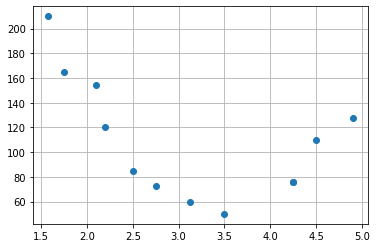

In [ ]:
X = np.array([1.58, 1.75, 2.10, 2.20, 2.50, 3.50, 2.75, 4.25, 4.25, 4.50, 4.90, 3.12])
Y = np.array([210, 165, 154, 120, 85, 50, 73, 76, 76, 110, 128, 60]) 

plt.plot(X, Y, "o")
plt.grid()
plt.show()

In [ ]:
V = np.array([X**2, X**1, X**0]).T
A  = np.dot(V.T, V)
A


array([[2038.60998132,  501.18614   ,  130.9908    ],
       [ 501.18614   ,  130.9908    ,   37.4       ],
       [ 130.9908    ,   37.4       ,   12.        ]])

In [ ]:
B =np.dot(V.T, Y)
B

array([12615.653,  3751.6  ,  1307.   ])

In [ ]:
a = np.linalg.solve(A,B)
a

array([  41.65417181, -290.61700608,  559.9802282 ])

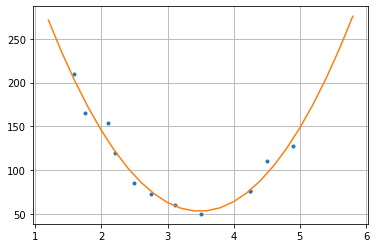

In [ ]:
Xr = np.arange(1.2,6,0.2)
def g(x):
    return a[0]*x**2 + a[1]*x + a[2]

plt.plot(X, Y, ".", Xr, g(Xr),'-')
plt.grid()
plt.show()

In [ ]:
#quando o amperímetro estiver marcando
valor = g(4)
valor

63.978952871732304

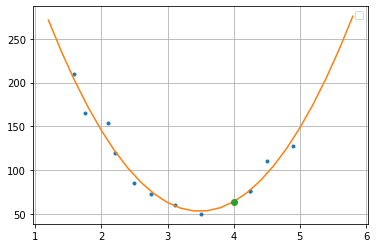

In [ ]:
fig, ax = plt.subplots()
ax.plot(X, Y, ".", Xr, g(Xr),'-')
ax.plot(4, valor, 'o')
plt.grid()
plt.show()

**5.** Dados a seguinte tabela use mínimos quadrados para

$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontrar o polinômio de 3 que melhor se ajusta aos pontos dados.

(b) Agora encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta. 

(c) Plote os gráficos e decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resposta.
